<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/ComputerVision/PA1_Super_Resolution/PA1_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment #1: Super Resolution
- Computer Vision (2022 winter)
- 20195003 고강빈

In [47]:
# import libraries
import numpy as np
import cv2

# for colab
from google.colab.patches import cv2_imshow

In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Method #1

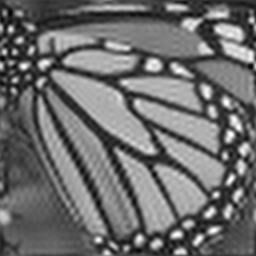

(256, 256)

In [49]:
# load upsampled image
img_high = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')
img_high = cv2.cvtColor(img_high, cv2.COLOR_BGR2GRAY).astype(np.float32)
cv2_imshow(img_high)
img_high.shape

In [50]:
height, width = img_high.shape

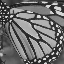

(64, 64)

In [51]:
# load ground truth image
img_gt = cv2.imread('/content/drive/MyDrive/data/CompVision/HR.png') # Ground Truth
img_gt = cv2.cvtColor(img_gt, cv2.COLOR_BGR2GRAY).astype(np.float32)
img_low = cv2.resize(img_gt, dsize=(height//4, width//4)) # Input of the algorithm (low resolution image)
cv2_imshow(img_low)
img_low.shape

In [52]:
# configuration
max_iter = 1_000
lr = 0.1

In [53]:
# Gradient Descent
for t in range(max_iter):
  img_dh = cv2.resize(img_high, dsize=(height//4, width//4))
  grad = np.subtract(img_dh, img_low)
  grad = cv2.resize(grad, dsize=(height,width))
  img_high = np.subtract(img_high, np.dot(lr, grad))
  loss = np.sum(np.square(np.subtract(img_low, cv2.resize(img_high, dsize=(height//4, width//4))))).mean()

  if t%100 == 0:
    print(f'loss at {t} iter: {loss}')

print(img_high.shape)
cv2.imwrite('/content/drive/MyDrive/data/CompVision/method1.png', img_high)

loss at 0 iter: 2682946.645786953
loss at 100 iter: 1.5204553538888248
loss at 200 iter: 5.717778608113414e-06
loss at 300 iter: 3.387687368461402e-11
loss at 400 iter: 2.3732473268832557e-16
loss at 500 iter: 1.811895170156881e-21
loss at 600 iter: 6.84723061578424e-23
loss at 700 iter: 6.842074620907715e-23
loss at 800 iter: 6.842074620907715e-23
loss at 900 iter: 6.842074620907715e-23
(256, 256)


True

## Method #2

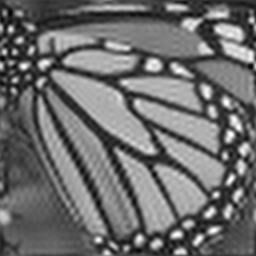

(256, 256)

In [54]:
# load upsampled image
img_high = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')
img_high = cv2.cvtColor(img_high, cv2.COLOR_BGR2GRAY).astype(np.float32)
cv2_imshow(img_high)
img_high.shape

In [55]:
height, width = img_high.shape

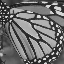

(64, 64)

In [56]:
# load ground truth image
img_gt = cv2.imread('/content/drive/MyDrive/data/CompVision/HR.png') # Ground Truth
img_gt = cv2.cvtColor(img_gt, cv2.COLOR_BGR2GRAY).astype(np.float32)
img_low = cv2.resize(img_gt, dsize=(height//4, width//4)) # Input of the algorithm (low resolution image)
cv2_imshow(img_low)
img_low.shape

In [57]:
# configuration
gamma = 6
beta = 0.001
max_iter = 1000
lr = 0.1

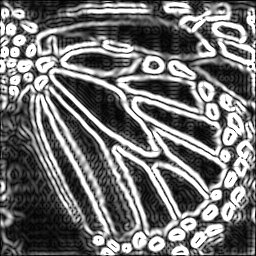

max: 42939.4804687501
min: 42939.4804687501


In [58]:
dx = (cv2.Sobel(img_high, -1, 1, 0))
dy = (cv2.Sobel(img_high, -1, 0, 1))

abs_dx = np.abs(dx)
abs_dy = np.abs(dy)
sobel = abs_dx + abs_dy
cv2_imshow(sobel)

grad_dl = np.linalg.norm(sobel) + 1e-10

print(f'max: {np.max(grad_dl)}\nmin: {np.min(grad_dl)}')

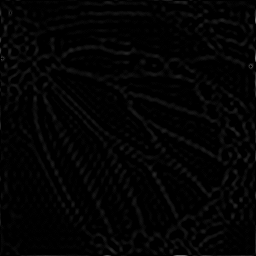

max: 2594.957763671875
min: 2594.957763671875


In [59]:
laplacian = cv2.Laplacian(img_high, -1)
cv2_imshow(laplacian)

grad_derivate = np.linalg.norm(laplacian)

print(f'max: {np.max(grad_derivate)}\nmin: {np.min(grad_derivate)}')

In [60]:
edge = grad_dl - grad_derivate
edge = np.clip(edge, a_min=0.0, a_max=1.0)
print(edge)
print(f'max: {np.max(edge)}\nmin: {np.min(edge)}')

1.0
max: 1.0
min: 1.0


In [61]:
laplacian_grad = gamma * laplacian * (edge/grad_dl)
laplacian_grad

array([[-0.00055893, -0.00041919, -0.00111785, ..., -0.00027946,
        -0.00013973,  0.00055893],
       [-0.00055893, -0.00013973,  0.00027946, ..., -0.00041919,
        -0.00069866,  0.00013973],
       [-0.00097812,  0.00041919,  0.00069866, ..., -0.00055893,
        -0.00055893,  0.00027946],
       ...,
       [ 0.00083839,  0.00041919, -0.00013973, ...,  0.00041919,
         0.00083839,  0.0026549 ],
       [ 0.00097812, -0.00027946, -0.00055893, ...,  0.00027946,
         0.00069866,  0.00139732],
       [ 0.00027946, -0.00013973,  0.        , ...,  0.00195624,
         0.00027946,  0.00055893]], dtype=float32)

In [62]:
# Gradient Descent
for t in range(max_iter):
  laplacian = cv2.Laplacian(img_high, -1)
  img_dh = cv2.resize(img_high, dsize=(height//4, width//4))
  grad = np.subtract(img_dh, img_low) 
  grad = cv2.resize(grad, dsize=(height,width)) - beta*(laplacian-laplacian_grad)
  img_high = np.subtract(img_high, np.dot(lr, grad))
  loss = np.sum(np.square(np.subtract(img_low, cv2.resize(img_high, dsize=(height//4, width//4))))).mean()

  if t%100 == 0:
    print(f'loss at {t} iter: {loss}')

print(img_high.shape)
cv2.imwrite('/content/drive/MyDrive/data/CompVision/method2.png', img_high)

loss at 0 iter: 2682928.16323609
loss at 100 iter: 7.8037582570464235
loss at 200 iter: 2.8376784207099153
loss at 300 iter: 2.8121849806058297
loss at 400 iter: 2.7926262900522945
loss at 500 iter: 2.7737965530258784
loss at 600 iter: 2.7556551116985037
loss at 700 iter: 2.7381728549354403
loss at 800 iter: 2.7213220954022015
loss at 900 iter: 2.705076470831301
(256, 256)


True

## Evaluate

In [84]:
# Metrics: MSE & PSNR
upsampled = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')

method1 = cv2.imread('/content/drive/MyDrive/data/CompVision/method1.png')
method2 = cv2.imread('/content/drive/MyDrive/data/CompVision/method2.png')

# MSE
def mse(result):
  result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
  mse = np.sum(np.square(np.subtract(img_gt, result))/(height*width)).mean()
  return mse

# PSNR
def psnr(result):
  psnr = np.sum(10*np.log10((255*255)/mse(result))).mean()
  return psnr

In [74]:
print(psnr(upsampled))
print(psnr(method1))
print(psnr(method2))

18.00910118364443
20.715233209285877
20.743289468048836


## Additional Idea1: Median Filtering

In [85]:
img_high = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')
img_high = cv2.cvtColor(img_high, cv2.COLOR_BGR2GRAY).astype(np.float32)
padded = cv2.copyMakeBorder(img_high, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
padded.shape

(258, 258)

In [86]:
def apply_median_filter(img, filter_size, stride):
  input_shape = img.shape
  result_shape = np.int64((np.array(input_shape)-np.array(filter_size))/stride+1)

  result = np.zeros(result_shape)

  for h in range(0, result_shape[0], stride):
    for w in range(0, result_shape[1], stride):
      temp = np.sort((img[h:h+filter_size[0], w:w+filter_size[1]]).ravel())
      result[h,w] = temp[int(filter_size[0]*filter_size[1]/2)]
  
  return result

In [87]:
result = apply_median_filter(padded, (3,3), 1)

print(result.shape)
cv2.imwrite('/content/drive/MyDrive/data/CompVision/add1.png', result)

(256, 256)


True

In [89]:
add1 = cv2.imread('/content/drive/MyDrive/data/CompVision/add1.png')
print(psnr(add1))

18.076934579416267


## Additional Idea2: Prior using Frequency Domain Filtering

In [118]:
img_high = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')
img_high = cv2.cvtColor(img_high, cv2.COLOR_BGR2GRAY).astype(np.float32)

In [119]:
# fft
fft = np.fft.fft2(img_high)
mag_fft = np.log(np.abs(fft)+1)

# fft shift
fshift = np.fft.fftshift(fft)
mag_fshift = np.log(np.abs(fshift)+1)

In [120]:
def cal_d(center_row, center_col, row, col):
  s = (center_row-row)**2 + (center_col-col)**2
  return s**(1/2)

def filter_radius(fshift, radius, low=True):
  rows, cols = fshift.shape
  center_row, center_col = int(rows/2), int(cols/2)

  filter_fshift = fshift.copy()

  for row in range(rows):
    for col in range(cols):
      if low: # low-pass filter
        if cal_d(center_row, center_col, row, col) > radius:
          filter_fshift[row, col] = 0
      else: # high-pass filter
        if cal_d(center_row, center_col, row, col) < radius:
          filter_fshift[row,col] = 0

  return filter_fshift

In [121]:
# apply low-pass filter
low_fshift = filter_radius(fshift, radius=100, low=True)
low_pass_magnitude = np.log(np.abs(low_fshift)+1)

In [122]:
# apply high-pass filter
high_fshift = filter_radius(fshift, radius=20, low=False)
high_pass_magnitude = np.log(np.abs(high_fshift)+1)

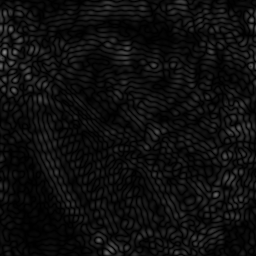

In [123]:
high_ishift = np.fft.ifftshift(high_fshift)
high_img = np.fft.ifft2(high_ishift)
high_img = np.abs(high_img)
cv2_imshow(high_img)

In [124]:
# method 2
laplacian_grad = gamma * laplacian * (high_img/grad_dl)
# Gradient Descent
for t in range(max_iter):
  laplacian = cv2.Laplacian(img_high, -1)
  img_dh = cv2.resize(img_high, dsize=(height//4, width//4))
  grad = np.subtract(img_dh, img_low) 
  grad = cv2.resize(grad, dsize=(height,width)) - beta*(laplacian-laplacian_grad)
  img_high = np.subtract(img_high, np.dot(lr, grad))
  loss = np.sum(
      np.square(
          np.subtract(img_low, cv2.resize(img_high, dsize=(height//4, width//4))
          )
          )
      ).mean()

  if t%100 == 0:
    print(f'loss at {t} iter: {loss}')

print(img_high.shape)
cv2.imwrite('/content/drive/MyDrive/data/CompVision/add2.png', img_high)

loss at 0 iter: 2682927.508956398
loss at 100 iter: 7.78060005482792
loss at 200 iter: 2.822696429816193
loss at 300 iter: 2.797281283473562
loss at 400 iter: 2.777786159776161
loss at 500 iter: 2.759017623405321
loss at 600 iter: 2.740935136752382
loss at 700 iter: 2.72350968058697
loss at 800 iter: 2.7067136552209425
loss at 900 iter: 2.6905207820442865
(256, 256)


True

In [125]:
add2 = cv2.imread('/content/drive/MyDrive/data/CompVision/add2.png')
print(psnr(add2))

20.743210498037676
